# STEP 1  : IMPORTING LIBRARIES

We import the necessary libraries inorder to perform appropriate operations on data.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

# STEP 2 : READING DATA

In this step, we read the csv format file into a dataframe.

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# STEP 3 : PERFORMING EDA

# 3a) Finding the shape of the data

In [4]:
print('The shape of the data is',data.shape)

The shape of the data is (1338, 7)


# 3b) Data type of each attribute

In [5]:
print('the data type of each attribute is')
data.info()

the data type of each attribute is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3c) Checking the presence of missing values 

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
null=data[data.isnull().any(1)]
print(null)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


As, we can see there are no null points

# 3d) 5 point summary of numerical attributes

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# 3e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

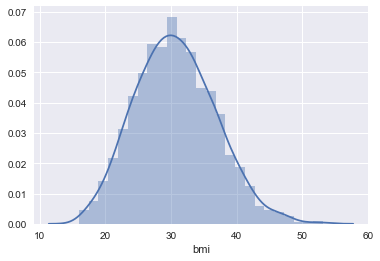

In [9]:
sns.distplot(data['bmi'])

Based on the distplot, we can infer that bmi is normally distributed

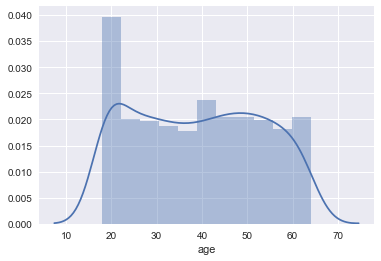

In [10]:
sns.distplot(data['age'])

Based on the above distplot, the age data is apprximately a normal distribution

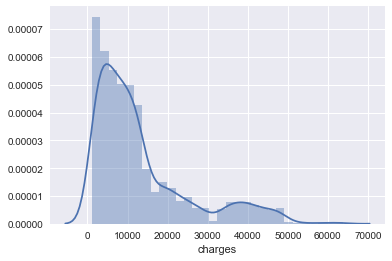

In [11]:
sns.distplot(data['charges'])

Charges is highly skewed towards right

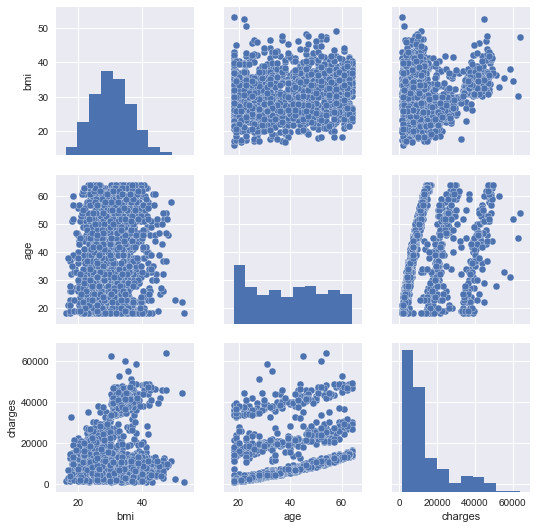

In [12]:
sns.pairplot(data[['bmi', 'age', 'charges']])

Pair Plot is drawn so as to find any relation among the bmi, age, charges and we cannot infer any positive or negative correlation among any pair

# 3f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [13]:
skewness_bmi=stats.skew(data['bmi'], axis=0, bias=True)
skewness_age=stats.skew(data['age'], axis=0, bias=True)
skewness_charges=stats.skew(data['charges'], axis=0, bias=True)
print('The skewness of bmi column is: ',skewness_bmi)
print('The skewness of age column is: ',skewness_age)
print('The skewness of charges column is: ',skewness_charges)

The skewness of bmi column is:  0.28372857291709386
The skewness of age column is:  0.055610083072599126
The skewness of charges column is:  1.5141797118745743


Charges column has the highest skewness and the same is observed in distribution plot.

# 3g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

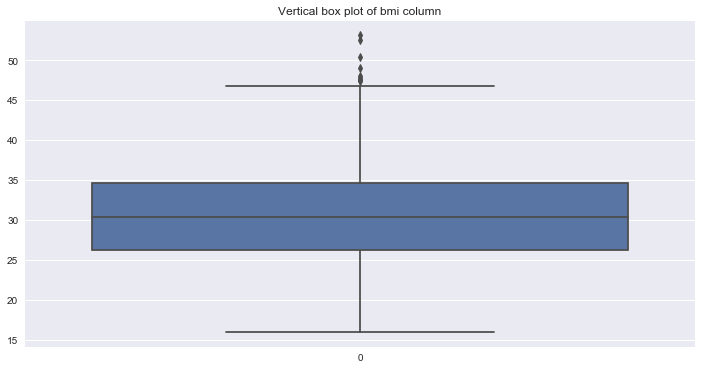

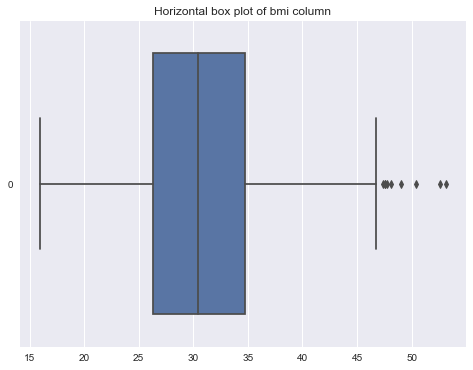

In [14]:
plt.figure(figsize=(12,6))
plt.title("Vertical box plot of bmi column")
sns.boxplot(data=data['bmi'])

plt.figure(figsize=(8,6))
plt.title("Horizontal box plot of bmi column")
sns.boxplot(data=data['bmi'],orient='h')

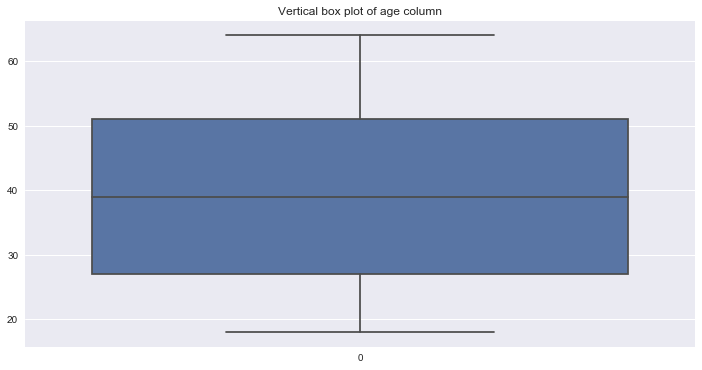

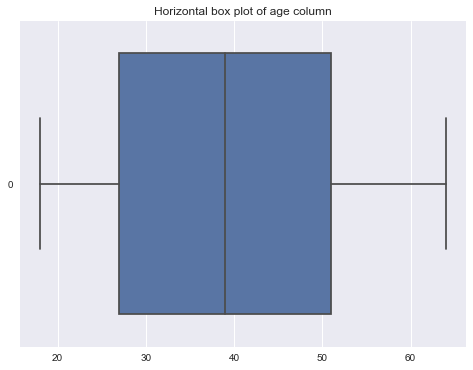

In [15]:
plt.figure(figsize=(12,6))
plt.title("Vertical box plot of age column")
sns.boxplot(data=data['age'])

plt.figure(figsize=(8,6))
plt.title("Horizontal box plot of age column")
sns.boxplot(data=data['age'],orient='h')

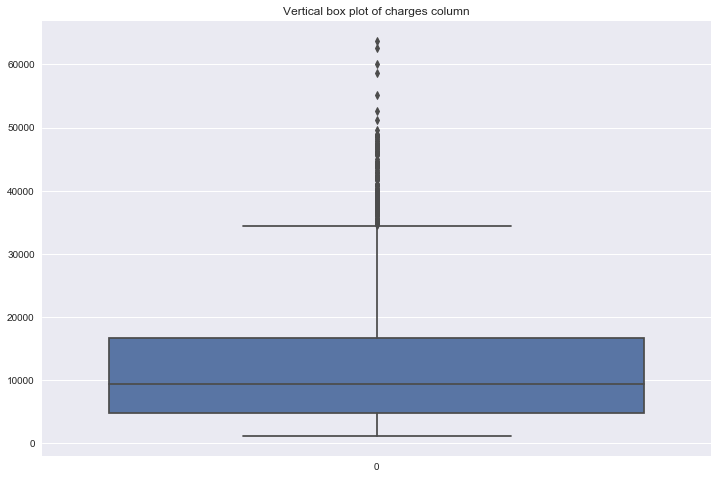

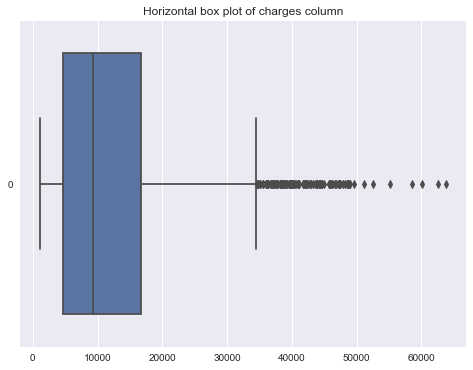

In [16]:
plt.figure(figsize=(12,8))
plt.title("Vertical box plot of charges column")
sns.boxplot(data=data['charges'])

plt.figure(figsize=(8,6))
plt.title("Horizontal box plot of charges column")
sns.boxplot(data=data['charges'],orient='h')

* The outliers are present in bmi and charges column of the dataframe. These are visualised with the help of both horizontal and vertical boxplots.

* There are few outliers in bmi and a lot of outliers in charges column 

# 3h) Distribution of categorical columns (include children)

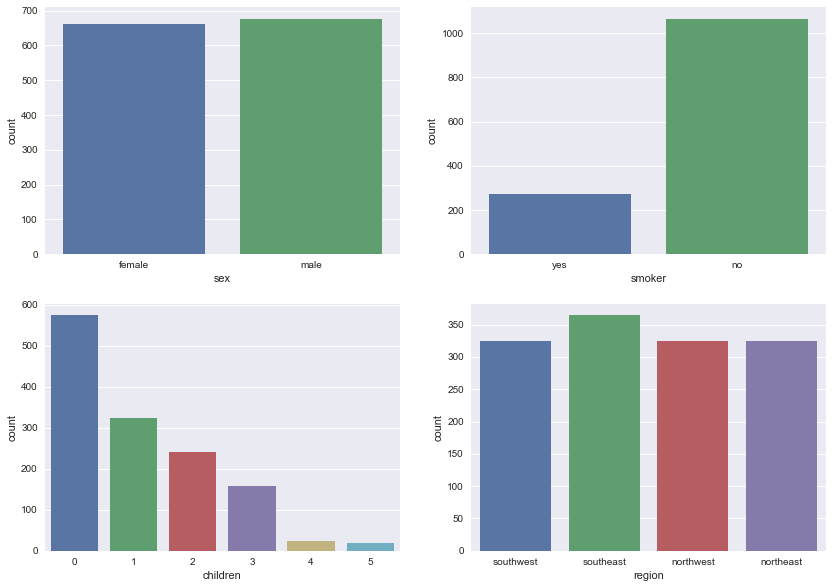

In [17]:
f,ax=plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(data['sex'],ax=ax[0][0])
sns.countplot(data['smoker'],ax=ax[0][1])
sns.countplot(data['children'],ax=ax[1][0])
sns.countplot(data['region'],ax=ax[1][1])
f.show()

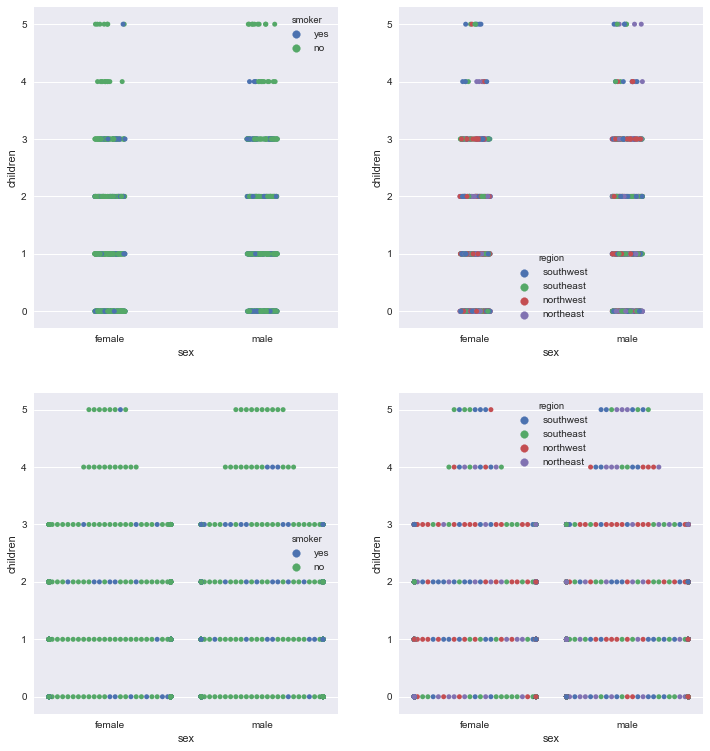

In [18]:
f,ax=plt.subplots(2, 2, figsize=(12,13))
sns.stripplot(data['sex'], data['children'],  data['smoker'],jitter=True,ax=ax[0][0])
sns.stripplot(data['sex'], data['children'],  data['region'],jitter=True,ax=ax[0][1])
sns.swarmplot(data['sex'], data['children'],  data['smoker'],ax=ax[1][0])
sns.swarmplot(data['sex'], data['children'],  data['region'],ax=ax[1][1])
f.show()

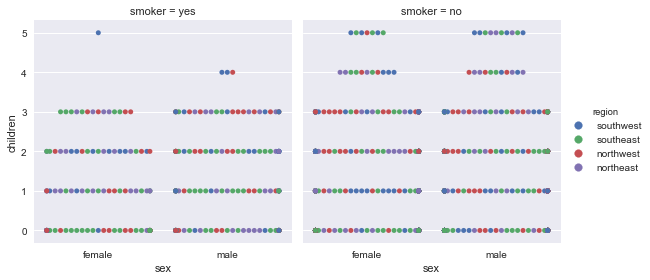

In [19]:
sns.factorplot(x="sex", 
               y="children", 
               hue="region", 
               col="smoker", 
               data=data, 
               kind="swarm")

# 3i) Pair plot that includes all the columns of the data frame

In [20]:
#We need to label encode the data so as to plot a pair plot which includes all the data columns 
#and this is because the pair plot ignores the data which are in string format
label_encoder = preprocessing.LabelEncoder()
d=data
d['sex']=label_encoder.fit_transform(d['sex'])
d['smoker']=label_encoder.fit_transform(d['smoker'])
d['region']=label_encoder.fit_transform(d['region'])

In [21]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


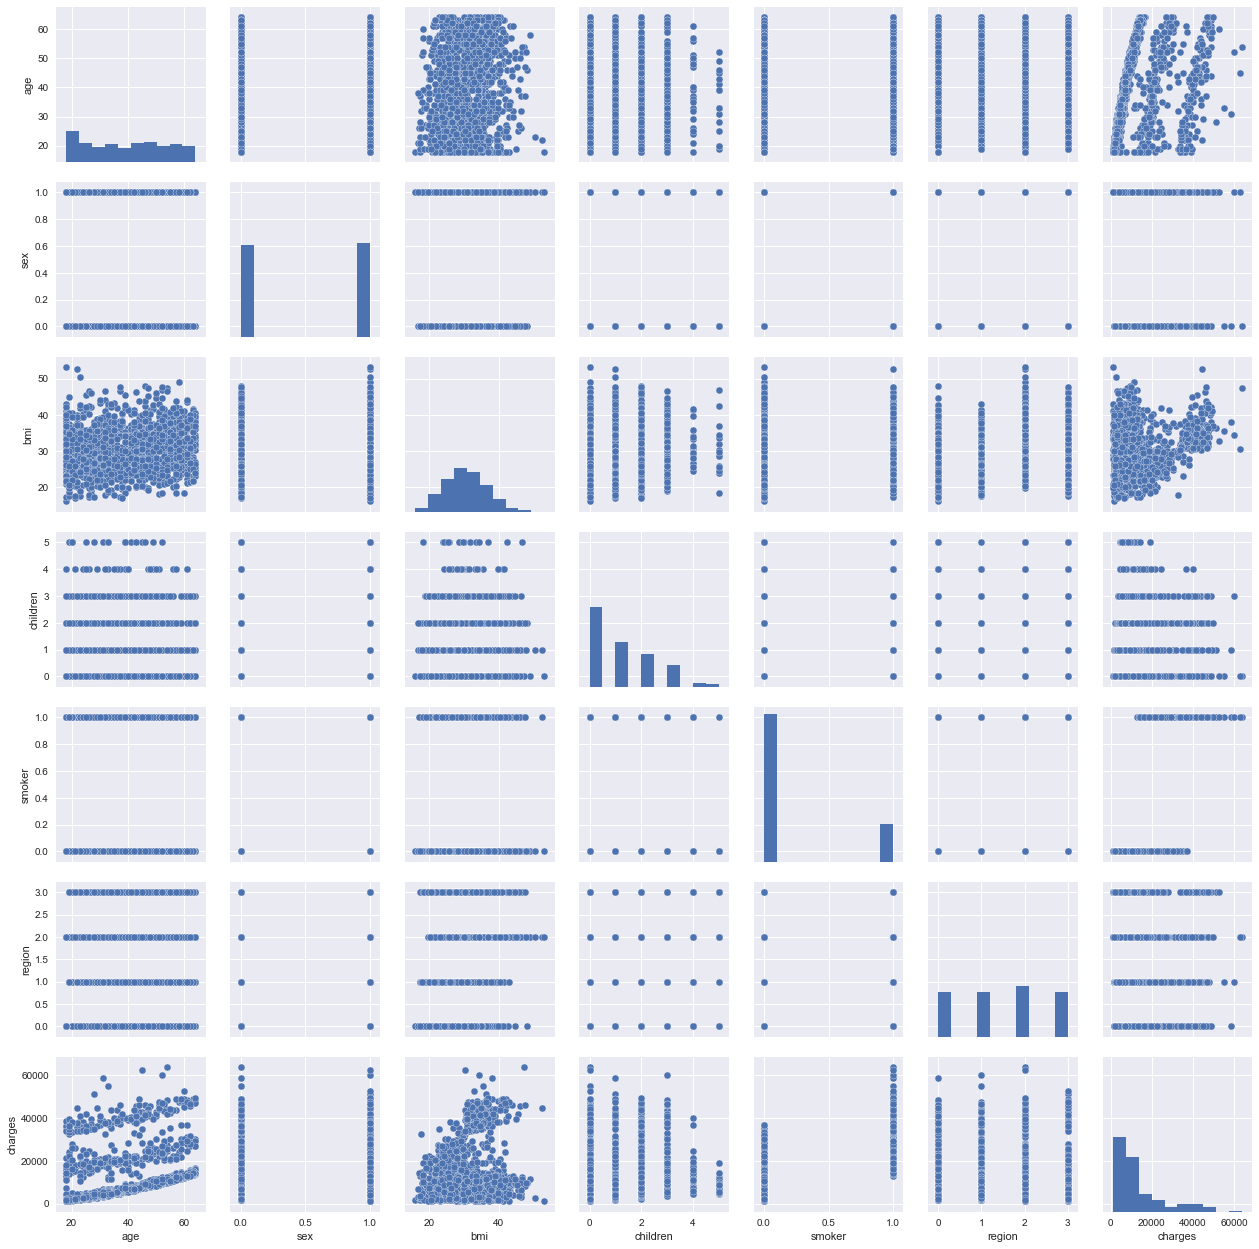

In [22]:
sns.pairplot(d)

Observation ----- In the diagnol, as we can see, for categorical data, the plot gave a bar plot and for numerical data(without label encoding) has a reasonalble normal distributed curve.


Observation ----- Smokers have claimed more amount when compared with non smokers; Other relationships cannot be inferred as they are mostly scattered

# 4a)  Do charges of people who smoke differ significantly from the people who don't? 

In [4]:
print("Individual count of smoker column: "," "*500, data['smoker'].value_counts())

Individual count of smoker column:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       no     1064
yes     274
Name: smoker, dtype: int64


NULL HYPOTHESIS(H0): Charges remain same for both smokers and non smokers


ALTERNATIVE HYPOTHESIS(Ha): Charges differ significantly between smokers and non smokers

## Level of significance = 0.05

In [5]:
null = 'Charges remain same for both smokers and non smokers'
alternate = 'Charges differ significantly between smokers and non smokers'
a=np.array(data[data.smoker=='yes'].charges)
b=np.array(data[data.smoker=='no'].charges)
t_stat, p_value = stats.ttest_ind(a,b,axis=0)
print("the caluclated value of tstatistic is",t_stat)
print("The pvalue is",p_value)
print(""*1000)
print("Based on the statistical evidence")
if p_value > 0.05:
    print("we fail to reject null hypothesis as the p_value", p_value, "is greater than 0.05")
    print(null)
else:
    print("we reject null hypothesis as the p_value", p_value, "is less than 0.05")
    print(alternate)

the caluclated value of tstatistic is 46.664921172723716
The pvalue is 8.271435842177219e-283

Based on the statistical evidence
we reject null hypothesis as the p_value 8.271435842177219e-283 is less than 0.05
Charges differ significantly between smokers and non smokers


# 4b)  Does bmi of males differ significantly from that of females?

In [6]:
print("Individual count of bmi column: "," "*500, data['sex'].value_counts())

Individual count of bmi column:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       male      676
female    662
Name: sex, dtype: int64


NULL HYPOTHESIS(H0): bmi remains same between males and females


ALTERNATIVE HYPOTHESIS(Ha): bmi differ significantly between males and females

## Level of significance = 0.05

In [7]:
null = 'bmi remains same between males and females'
alternate = 'bmi differ significantly between males and females'
a=np.array(data[data['sex']=='male'].bmi)
b=np.array(data[data['sex']=='female'].bmi)
t_stat, p_value = stats.ttest_ind(a,b,axis=0)
print("the caluclated value of tstatistic is",t_stat)
print("The pvalue is",p_value)
print(""*1000)
print("Based on the statistical evidence")
if p_value > 0.05:
    print("we fail to reject null hypothesis as the p_value", p_value, "is greater than 0.05")
    print(null)
else:
    print("we reject null hypothesis as the p_value", p_value, "is less than 0.05")
    print(alternate)

the caluclated value of tstatistic is 1.696752635752224
The pvalue is 0.08997637178984932

Based on the statistical evidence
we fail to reject null hypothesis as the p_value 0.08997637178984932 is greater than 0.05
bmi remains same between males and females


# 4c)  Is the proportion of smokers significantly different in different genders?

In [8]:
print("table count for smoker and gender column:")
table=pd.crosstab(data['sex'],data['smoker'])
table

table count for smoker and gender column:


smoker,no,yes
sex,,
female,547,115
male,517,159


NULL HYPOTHESIS(H0): Proportion of smokers is same in male and female 


ALTERNATIVE HYPOTHESIS(Ha): Proportion of smokers differ significantly between male and female

## Level of significance = 0.05

In [9]:
null = 'Proportion of smokers is same in male and female'
alternate = 'Proportion of smokers differ significantly between male and female'
chi_value, p_value, dof, expected = stats.chi2_contingency(table)
print("the caluclated value of chi_value is",chi_value)
print("The pvalue is",p_value)
print(""*1000)
print("Based on the statistical evidence")
if p_value > 0.05:
    print("we fail to reject null hypothesis as the p_value", p_value, "is greater than 0.05")
    print(null)
else:
    print("we reject null hypothesis as the p_value", p_value, "is less than 0.05")
    print(alternate)

the caluclated value of chi_value is 7.39291081459996
The pvalue is 0.006548143503580696

Based on the statistical evidence
we reject null hypothesis as the p_value 0.006548143503580696 is less than 0.05
Proportion of smokers differ significantly between male and female


# 4d)  Is the distribution of bmi across women with no children, one child and two children, the same?

In [10]:
print("Individual count of bmi column for the corresponding number of children: "," "*500, data['children'].value_counts())

Individual count of bmi column for the corresponding number of children:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


NULL HYPOTHESIS(H0): No of children has no effect on bmi


ALTERNATIVE HYPOTHESIS(Ha): No of children has some effect on bmi

## Level of significance = 0.05

In [11]:
data_female = data[data['sex']=='female']

In [12]:
null='No of Children has no effect on bmi'
alternate = 'No of Children has some effect on bmi'
zero_child=data_female[data_female['children']==0].bmi
one_children=data_female[data_female['children']==1].bmi
two_children=data_female[data_female['children']==2].bmi
f_stat, p_value = stats.f_oneway(zero_child, one_children, two_children)
print("the caluclated value of ftatistic is",f_stat)
print("The pvalue is",p_value)
print(""*1000)
print("Based on the statistical evidence")
if p_value > 0.05:
    print("we fail to reject null hypothesis as the p_value", p_value, "is greater than 0.05")
    print(null)
else:
    print("we reject null hypothesis as the p_value", p_value, "is less than 0.05")
    print(alternate)

the caluclated value of ftatistic is 0.3344720147757968
The pvalue is 0.7158579926754841

Based on the statistical evidence
we fail to reject null hypothesis as the p_value 0.7158579926754841 is greater than 0.05
No of Children has no effect on bmi
